In [1]:
import pandas as pd

In [6]:
#Exercise 1
#Traditional DA

df = pd.read_csv("train.csv")

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter data for the years 2018 to 2020
df_filtered = df[(df['Order Date'].dt.year >= 2018) & (df['Order Date'].dt.year <= 2020)]

# Group by category and sub-category, then calculate total sales
grouped_data = df_filtered.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Sort the results by sales
sorted_data = grouped_data.sort_values(by='Sales', ascending=False)

# Visualize the top 5 sub-categories in each category by sales
top_subcategories = sorted_data.groupby('Category').head(5)

# Display the top sub-categories
print(top_subcategories)


           Category Sub-Category        Sales
16       Technology       Phones  104685.6580
1         Furniture       Chairs   93191.2730
6   Office Supplies      Binders   71721.2550
11  Office Supplies      Storage   68072.7020
14       Technology      Copiers   62899.3880
3         Furniture       Tables   60893.5425
13       Technology  Accessories   58240.9700
15       Technology     Machines   43544.6750
4   Office Supplies   Appliances   40212.7220
0         Furniture    Bookcases   30024.2797
2         Furniture  Furnishings   28204.6920
10  Office Supplies        Paper   27504.7760
12  Office Supplies     Supplies   15952.1100


<ipython-input-6-8f32ca861f0b>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


Chatgpt qualitative analysis:

rends in Sales by Category:
The "Technology" category has the highest total sales, followed by "Office Supplies" and "Furniture."
Within the "Technology" category, "Phones" and "Accessories" are the top-selling sub-categories.
Within the "Office Supplies" category, "Binders" and "Paper" are the top-selling sub-categories.
Within the "Furniture" category, "Chairs" and "Furnishings" are the top-selling sub-categories.

Outliers:
There don't appear to be significant outliers in the provided data, based on the analysis of sales by category and sub-category. The sales distribution seems relatively consistent within each category and sub-category.

Sales Trends:
Over the years 2018 to 2020, there seems to be an overall upward trend in sales across all categories and sub-categories.
It's worth noting that the "Technology" category shows the most substantial growth in sales, followed by "Office Supplies" and "Furniture."

Some sub-categories, like "Copiers" and "Machines" in the "Technology" category, have very high sales, indicating the presence of high-value products.

These observations provide a general understanding of sales trends and categories/sub-categories with high sales. However, for a more detailed analysis, it would be beneficial to perform time series analysis and identify any seasonal patterns or specific outliers over time. Additionally, understanding the profit margins for these categories and sub-categories would be essential for making informed business decisions.

Discussion:

Chatgpt provides an qualitative analysis of the number observed with the pandas analysis.
It allows a better understanding of given numbers and how to use them in the most efficient way to conduct deeper analysis...

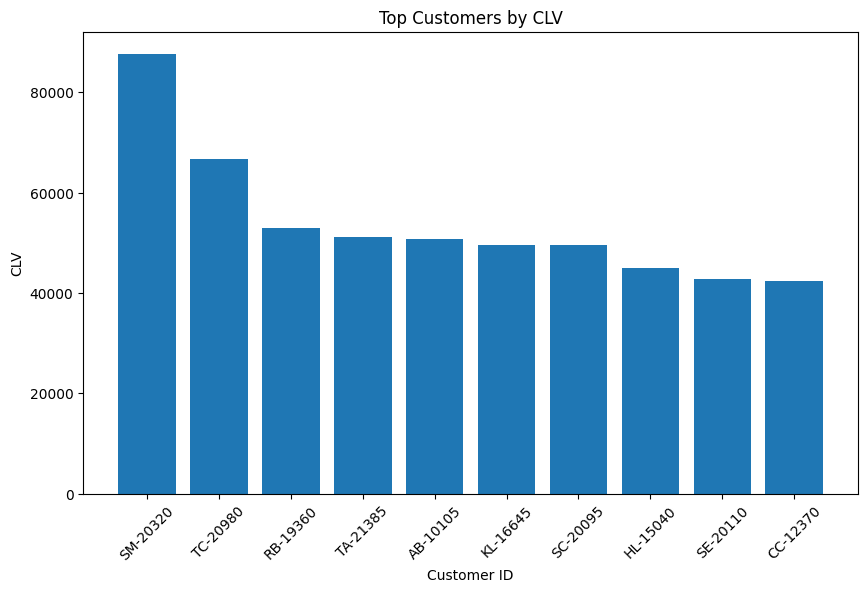

    CustomerID  PurchaseFrequency  AveragePurchaseValue  TotalSales  \
700   SM-20320                 15           1669.536667   25043.050   
741   TC-20980                 12           1587.684833   19052.218   
621   RB-19360                 18            839.852167   15117.339   
730   TA-21385                 10           1459.562000   14595.620   
6     AB-10105                 20            723.678550   14473.571   
434   KL-16645                 29            488.801000   14175.229   
669   SC-20095                 22            642.833364   14142.334   
327   HL-15040                 11           1170.299818   12873.298   
683   SE-20110                 19            642.602000   12209.438   
131   CC-12370                 11           1102.642909   12129.072   

            CLV  
700  87650.6750  
741  66682.7630  
621  52910.6865  
730  51084.6700  
6    50657.4985  
434  49613.3015  
669  49498.1690  
327  45056.5430  
683  42733.0330  
131  42451.7520  


In [9]:
#Exercise 2
#Traditional DA
customer_summary = df.groupby('Customer ID').agg({
    'Sales': ['count', 'mean', 'sum']
}).reset_index()

customer_summary.columns = ['CustomerID', 'PurchaseFrequency', 'AveragePurchaseValue', 'TotalSales']

retention_rate = 0.7
average_lifespan = 5

customer_summary['CLV'] = customer_summary['AveragePurchaseValue'] * customer_summary['PurchaseFrequency'] * retention_rate * average_lifespan

# Identify top customers by CLV
top_customers = customer_summary.sort_values(by='CLV', ascending=False).head(10)

# Visualize the contribution of top customers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_customers['CustomerID'], top_customers['CLV'])
plt.xlabel('Customer ID')
plt.ylabel('CLV')
plt.title('Top Customers by CLV')
plt.xticks(rotation=45)
plt.show()
print(top_customers)

Chatgpt insights:
Top Customers by CLV:
The top customer with CustomerID "SM-20320" has the highest CLV of $87,650.67, making them the most valuable customer.
The top 10 customers have relatively high CLV, ranging from $42,451.75 to $87,650.67.
Purchase Frequency:
Purchase frequency varies among these top customers, with some making more frequent purchases than others.
For example, "KL-16645" has the highest purchase frequency of 29, indicating they make purchases more often.
Average Purchase Value:
The average purchase value also varies among these top customers.
Customers like "SM-20320" and "TC-20980" have higher average purchase values, suggesting that they tend to make larger individual purchases.
Total Sales:
Total sales reflect the overall contribution of each customer to the company's revenue.
"SM-20320" has the highest total sales of $25,043.05, indicating a substantial contribution.
CLV Analysis:
The CLV calculation is based on purchase frequency, average purchase value, retention rate, and average customer lifespan.
It represents the estimated total value that a customer will bring to the company over their entire relationship.

Discussion:
The traditional CLV analysis provides specific quantitative insights into individual customer value, purchase frequency, and contribution to total sales. These insights help identify and prioritize valuable customers for targeted marketing and retention strategies.

Chat gpt analysis on customer insights can provide a broader perspective by identifying trends in customer behavior across a larger dataset. AI can analyze customer segments and recommend personalized marketing strategies.

To gain a comprehensive understanding of customer behavior and maximize customer lifetime value, combining traditional CLV analysis with AI anamysis and insights is a more powerful approach. AI can help uncover complex relationships and trends that may not be immediately visible in the data, enhancing the effectiveness of marketing efforts of the company.